---
title: Homework 5
jupyter: python3
---


This assignment will continue to use the American Community Survey (ACS) from the US Census.
You will need to refer to the documentation to know what the ACS variable names mean. You can find a copy of the codebook in the [Lab 4 folder on Google Drive](https://drive.google.com/drive/u/0/folders/1jkY0mTxBhwOvvCJE_CJ3LWiOr_9V1ojZ)


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
acs = pd.read_csv("./pums_short.csv.gz")

## Question 1: Working with missing data

### Q1.a

In the previous lab we counted the number of missing values for the `"RNTP"` column using

In [3]:
acs["RNTP"].isna().sum()

np.int64(202728)

Repeat for the `"VALP"` column. (If you want, you can compute both totals simultaneously.)

Print out the total number of rows in the `acs` table. What do you notice about the total number of rows and the sum of the missing values for these two columns?



In [4]:
print(acs["VALP"].isna().sum())
print(len(acs))

print(acs["VALP"].isna().sum() + acs["RNTP"].isna().sum())

# it is greater than the length of the dataset, so there are some rows that have both VALP and RNTP missing

97644
276632
300372




### Q1.b

Write a single line of code that proves that 100% of observations are missing either the `"VALP"` or `"RNTP"` measurements.



In [5]:
(acs["VALP"].isna() | acs["RNTP"].isna()).all()

np.True_


### Q1.c

The `.dropna()` method has a `subset = ['column1', 'column2']` argument that allows you to indicate which columns your want to use to control how rows are dropped from the result.

Create a table called `owners` that only includes households that have non-missing `"VALP"` entries. Print out the number of rows in this table and verify it matches the number of observations with *non-missing* `"VALP"` entries in `acs`. Hint:

In [6]:
hint = pd.Series([True, False, False, True])
~ hint

owners = acs.dropna(subset=['VALP'])
print(len(owners))
print(len(acs) - acs["VALP"].isna().sum())

178988
178988


### Q1.d

Using the `owners` table, what **proportion** of rows are missing `"HINCP"` values?

Find the median value of the non-missing values (hint: built in Panadas methods automatically drop missing values).

Using the `.fillna(VALUE, inplace = TRUE)` method, update the `"HINCP"` column of the `owners` table by making any missing values equal to median of the non-missing values.

Verify by showing that all of the values are not missing for `"HINCP"`.



In [7]:
print(owners["HINCP"].isna().mean()) #proportion of missing values in HINCP


median_hincp = owners["HINCP"].median()
print(owners["HINCP"].median()) #median


owners["HINCP"].fillna(median_hincp, inplace=True) #filling missing values with median

print(owners['HINCP'].isna().sum()) #check

0.01331932867007844
75000.0
0




### Q1.e

Repeat the above steps to create a table `renters` that contains only rows for people who are renting (have non-missing `RNTP` values) and median impute any missing `HINCP` values.

For both `owners` and `renters` compute the following quantities for the "HINCP" column.
- mean
- median
- IQR
- standard deviation

Which group has the higher location values? Which group has more spread? Comment briefly on what this means.




In [8]:
renters = acs.dropna(subset=['RNTP'])
median_hincp_renters = renters["HINCP"].median()
renters["HINCP"].fillna(median_hincp_renters, inplace=True) # set up table

#owners
print("owners")
print(owners["HINCP"].mean())
print(owners["HINCP"].median())
print(owners["HINCP"].quantile(0.75) - owners["HINCP"].quantile(0.25))
print(owners["HINCP"].std())

print("")

# renters
print("renters")
print(renters["HINCP"].mean())
print(renters["HINCP"].median())
print(renters["HINCP"].quantile(0.75) - renters["HINCP"].quantile(0.25))
print(renters["HINCP"].std())

# owners have higher location values and higher standard deviation (spread) than renters
# owners tend to have more money than renters / invest more in something they are going to live in permanently
# there is higher variety in the house market than in the rental market (more expensie houses and more cheap houses - necessity of needing a place to live)

owners
103101.59041946946
75000.0
85100.0
107811.39422510703

renters
56607.35456808833
40000.0
49600.0
64594.46491847602



## Question 2: More on distributions

### Q2.a Distributions of number of people in the household

Create a histogram of the number of people in the household (`NP`) for the `acs` data. Use the `bins` argument to create a histogram with 20 bins. Briefly discuss the location, spread, and skew of the distribution.


<Axes: xlabel='NP', ylabel='Count'>

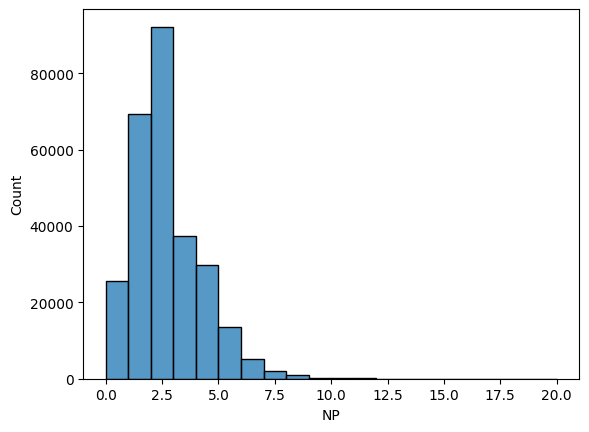

In [11]:

sb.histplot(data = acs, x = "NP", bins=20)


- The distribution is skewed right
- It is a very small skew
- The the spread of the data is small
- Average value is around 2.5 NP



### Q2.b Summaries of `NP`

Check your answers to the previous question by computing the mean, median, IQR, standard deviation, quantile skewness using the 0.25 and 0.75 quantile, and the coefficient of skewness of the `NP` column.


In [55]:
print("Mean:", acs["NP"].mean())
print("Median:", acs["NP"].median())
print("IQR:", acs["NP"].quantile(0.75) - acs["NP"].quantile(0.25))
print("Standard Deviation:", acs["NP"].std())
print("Quantile Skewness", (acs["NP"].quantile(0.75) - acs["NP"].median()) - (acs["NP"].median() - acs["NP"].quantile(0.25)) / (acs["NP"].quantile(0.75) - acs["NP"].quantile(0.25)))
print("Coefficient of Skewness:", sum((acs["NP"] - acs["NP"].mean())**3) / len(acs) / acs["NP"].std()**3)


Mean: 2.208764712686891
Median: 2.0
IQR: 2.0
Standard Deviation: 1.5263892280571307
Quantile Skewness 0.5
Coefficient of Skewness: 1.129330534996136



### Q2.c Comparing conditional distribution of NP for owners and renters

Create a side-by-side boxplot of the number of people in the household for owners and renters. What do you notice about the distributions of the number of people in the household for owners and renters?



### Q2.d Effect size of the difference in means

Compute the effect size of the difference in means of the number of people in the household for owners and renters. Use the formula for Cohen's $d$

$$d = \frac{\bar X_1 - \bar X_2}{S_p}$$

where $\bar X_1$ and $\bar X_2$ are the means of the two groups and $S_p$ is the pooled standard deviation.

Using the following table of effect sizes, how would you interpret the effect size of the difference in means of the number of people in the household for owners and renters?

| Effect size | Interpretation |
|-------------|-----------------|
| (0, 0.2]    | Small           |
| (0.2, 0.5]  | Medium          |
| (0.5, 0.1]  | Large           |
| (1, 2]      | Very large      |



In [62]:
mean_owners = owners["NP"].mean()
mean_renters = renters["NP"].mean()

std_owners = owners["NP"].std()
std_renters = renters["NP"].std()

n_owners = len(owners)
n_renters = len(renters)

# Pooled standard deviation
pooled_std = np.sqrt(((n_owners - 1) * std_owners**2 + (n_renters - 1) * std_renters**2) / (n_owners + n_renters - 2))

cohens_d = (mean_owners - mean_renters) / pooled_std

print("effect size:", cohens_d)
# there is a medium (somewhat) relationship between number of people in a household for owners and renters

effect size: 0.20477751312029022




## Question 3: More on means and medians

For this problem, we will investigate some theoretical properties of means and medians.

### Q3.a

We have already seen that the mean is the unique point $\bar X$ that makes $\sum_{i=1}^n (X_i - \bar X) = 0$. While we didn't introduce it as such, it is also the case that $\bar X$ is the point that **minimizes** $\sum_{i=1}^n (X_i - \bar X)^2$, the sum of squared deviations.

Using the `HINCP` column of the `acs` data, demonstrate that the sum of squared deviations from the mean is less than the sum of squared deviations from the median ($\sum_{i=1}^n (X_i - \tilde X)^2$).

Recall that `x**2` is how we square things in Python.

In [57]:
print("Sum of squared deviations from the mean:", ((acs["HINCP"] - acs["HINCP"].mean()) ** 2).sum())
print("Sum of squared deviations from the median:", ((acs["HINCP"] - acs["HINCP"].median()) ** 2).sum())
print("Difference", ((acs["HINCP"] - acs["HINCP"].mean()) ** 2).sum() - ((acs["HINCP"] - acs["HINCP"].median()) ** 2).sum())
# negative so less (verified)


Sum of squared deviations from the mean: 2514930676893640.5
Sum of squared deviations from the median: 2693213854216370.0
Difference -178283177322729.5


### Q3.b

Now, using $\bar X$ and $\tilde X$, compute the **sum of absolute distances**, $\sum_{i=1}^n | X_i - \bar X |$ and $\sum_{i=1}^n |X_i - \tilde X|$. Recall the `.abs()` method can compute the absolute value of a series.

In [58]:
sum_absolute_distances_mean = (acs["HINCP"] - acs["HINCP"].mean()).abs().sum()
sum_absolute_distances_median = (acs["HINCP"] - acs["HINCP"].median()).abs().sum()

print("Sum of absolute distances from the mean:", sum_absolute_distances_mean)
print("Sum of absolute distances from the median:", sum_absolute_distances_median)

Sum of absolute distances from the mean: 15613409566.75057
Sum of absolute distances from the median: 14508223606.0


### Q3.c

While we are not rising to the level of a mathematical proof, what do these result suggest about which type of measure of location would minimize the sum of absolute differences?


In [59]:
print("Difference:", sum_absolute_distances_mean - sum_absolute_distances_median)
#positive so median is smaller

Difference: 1105185960.7505703


Results suggest that using the median would minimize the sum of absolute differences